In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./train.csv',index_col = 'id')
df_test = pd.read_csv('./test.csv',index_col =  'id')
df_train.sample(5)

,keyword,location,text,target
id,,,,
9041,stretcher,3???2???????,ÛÏStretcher in 5 min // Speaker DeckÛ http:...,0
9216,suicide%20bombing,Chicago IL,bout to go suicide bombing http://t.co/ZoIPkPBD6o,1
1949,burning%20buildings,NaN,@MoFanon ?? your last retweet you would think ...,0
3446,derail,NaN,Dozens Die As two Trains Derail Into A River I...,1
1110,blew%20up,california mermaid ?,Some guy whistled at me in the parking lot &am...,0


In [3]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (7613, 4)
Test shape: (3263, 3)


In [4]:

for df in [df_train, df_test]:
    for col in df.columns:
        print(col,np.round(sum(df[col].isna())/len(df_train),4),'na value')
    print()


keyword 0.008 na value
location 0.3327 na value
text 0.0 na value
target 0.0 na value

keyword 0.0034 na value
location 0.1451 na value
text 0.0 na value



In [5]:
df_train.keyword.fillna("unknown",inplace=True)
df_train.location.fillna("unknown",inplace=True)
df_test.keyword.fillna("unknown",inplace=True)
df_test.location.fillna("unknown",inplace=True)

In [6]:
top30_loc = df_train.groupby(['location']).location.count().sort_values(ascending=False)[:30]

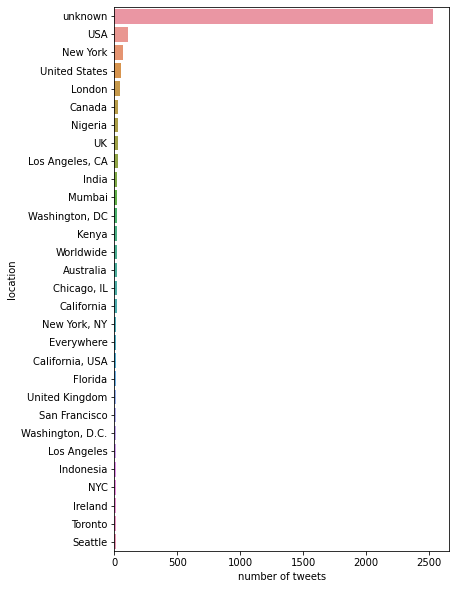

In [7]:
plt.figure(figsize = (6,10))
sns.barplot(x = top30_loc, y = top30_loc.index);
plt.xlabel('number of tweets');

(array([72., 53., 53., 47., 49., 50., 63., 33., 15.,  5.]),
 array([ 1. ,  5.1,  9.2, 13.3, 17.4, 21.5, 25.6, 29.7, 33.8, 37.9, 42. ]),
 <BarContainer object of 10 artists>)

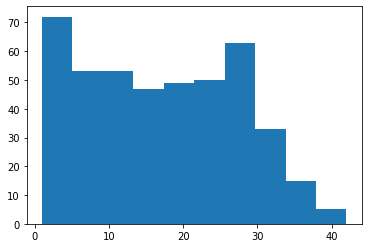

In [21]:
temp = df_train.groupby(['target','keyword']).keyword.count()
plt.hist(temp.values)

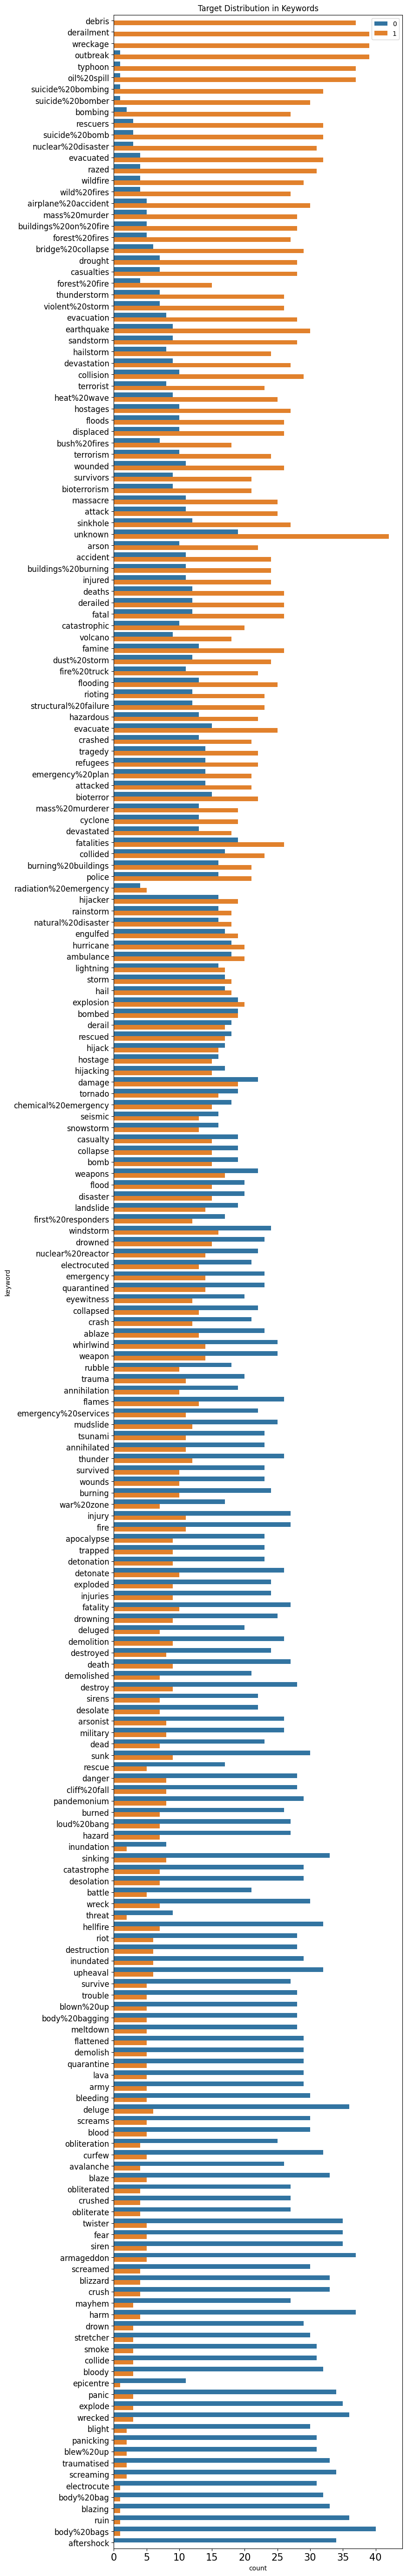

In [24]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

In [22]:
# plt.pie(series[:40].values,labels=series[:40].index)
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)

Text(0.5, 1.0, 'Real disaster or not distribution')

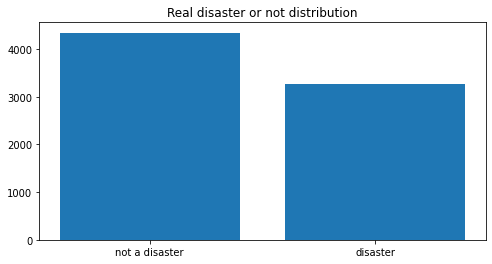

In [20]:

target_count = df_train.target.value_counts()
plt.figure(figsize=(8,4))
plt.bar(['not a disaster','disaster'], target_count.values)
plt.title("Real disaster or not distribution")